## Purpose of this Project

### We would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

#### This notebook will explore:

1. Distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
2. Distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3. What is the average time to cancel on average? Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4. Distribution of average ETA by hours. How can this plot be explained?

### Next Steps

+ Read in datasets and begin exploring

In [1]:
# reading in the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading in offers csv
offers = pd.read_csv('data/data_offers.csv')

# reading in orders.csv
orders = pd.read_csv('data/data_orders.csv')

### First Steps

+ Load in offers and orders dataset
+ Look at the first five rows 

In [2]:
# looking at the first five rows of the offers dataset
offers.head(5)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [3]:
# understanding the data landscape of the offers dataset
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [4]:
# looking at the first five columns of the orders dataset
orders.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [5]:
# understanding the data landscape of the orders dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


### Next Steps

+ Manipulation of data will be more efficient if the tables are merged
+ Merge the tables on the order number
+ Merging tables is the python version of joining tables in SQL
+ Defining the how to merge the table (outer, left, right, inner) and on a specific row or rows is the purpose

In [6]:
# merging the tables and rename column order_datetime to order_date
df = pd.merge(orders, offers, how = 'inner', on = 'order_gk').rename({"order_datetime" : "order_time"}, axis = 1)
df

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0,300051590196
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0,300051590176
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,300051648809
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,300051648910


In [7]:
# taking a random sample from the dataset and looking at ten examples
df.sample(n = 10, random_state = 42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,9:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,2:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,3:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,7:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


### Observation

+ After merging and looking at the data, two columns stuck out and believe we can feature engineer them to be more readable
+ They are:
+ is_driver_assigned_key - whether a driver has been assigned. Instead of 1 and 0 for Yes and No, Yes and No would help read the data easier
+ order_status_key - status, an enumeration consisting of the following mapping:
- 4 - cancelled by client,
- 9 - cancelled by system, i.e., a reject

+ Instead of 4 and 9, we can feature engineer it to read Client Cancellation instead of 4, and System Cancellation instead if 9

### Next Steps

+ This can be performed using the numpy where function
+ It essentially works like an =IF() statement in google sheets where if the condition is true, you can give it a specific label or else name the label something different
+ Ie. If order_status_key equals 4, label it Client Cancellation, or else name it System Cancellation
+ In SQL, this is similar to the CASE WHEN function 
+ Ie. CASE WHEN order_status_key = 4 THEN 'Client Cancellation' ELSE 'System Cancellation' END 

In [8]:
# using the numpy where function on the is_driver_assigned_key, renaming the column and replacing 1, 0 with Yes or No to make improve data readibility
df['is_driver_assigned'] = np.where(df['is_driver_assigned_key'] == 1, "Yes", "No")

# using the numpy where function on the order_status_key, renaming the column and replacing 4, 9 with Client Cancellation or System Cancellation to make improve data readibility
df['order_status'] = np.where(df['order_status_key'] == 4, "Client Cancellation", "System Cancellation")

# taking a random sample from the dataset and looking at ten examples
df.sample(n = 10, random_state = 42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946,Yes,Client Cancellation
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519,No,Client Cancellation
29083,9:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740,No,Client Cancellation
16926,2:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394,No,Client Cancellation
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163,No,Client Cancellation
13008,3:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313,No,System Cancellation
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742,No,Client Cancellation
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957,No,System Cancellation
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801,No,Client Cancellation
18189,7:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628,Yes,Client Cancellation


### Distribution of orders according to reasons for failure

+ Cancellations before and after driver assignment, and reasons for order rejection 
+ Analyze the resulting plot. Which category has the highest number of orders?

### Next Steps

+ Understand the distribution of order cancellations by driver assigned and order_status
+ Create a new table grouped by is_driver_assigned and order_status, with a count to understand the distribution

In [9]:
cancellations= df.groupby(['is_driver_assigned', 'order_status'])['order_gk'].count().reset_index()
cancellations['perc_of_cancelled'] = round(cancellations['order_gk'] / cancellations['order_gk'].sum() * 100, 2)
cancellations

,is_driver_assigned,order_status,order_gk,perc_of_cancelled
0,No,Client Cancellation,13435,42.97
1,No,System Cancellation,9469,30.28
2,Yes,Client Cancellation,8360,26.74
3,Yes,System Cancellation,4,0.01


### Observations

+ 73% of Cancellations occur before a driver is assigned
+ After the driver is assigned, however, it is almost always the customer cancelling the order
+ There were 4 orders rejected by the system, which may be worth exploring how often this happens and the cost associated with it
+ It should be flagged to Product and Engineering, and if the cost is high, it may become a higher priority

### Distribution of failed orders by hours 

+ Now that we know the distribution of cancellations prior to and after a driver is assigned, it is time to dig deeper
+ Is there a trend that certain hours have an abnormally high proportion of one category or another? 
+ What hours are the biggest fails? 
+ How can this be explained?

### Next Steps

+ Create a new column containing the hour to manipulate data
+ We do this by usind the dt.hour function with the datetime library
+ Create a table by hour and the number of cancellation to get a better illustration of the distribution

In [10]:
# creating a new column with the hour from the order time
df['hour'] = pd.to_datetime(df['order_time']).dt.hour

In [11]:
# taking a random sample from the dataset and looking at ten examples
df.sample(n = 10, random_state = 42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,hour
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946,Yes,Client Cancellation,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519,No,Client Cancellation,10
29083,9:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740,No,Client Cancellation,9
16926,2:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394,No,Client Cancellation,2
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163,No,Client Cancellation,21
13008,3:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313,No,System Cancellation,3
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742,No,Client Cancellation,14
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957,No,System Cancellation,20
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801,No,Client Cancellation,18
18189,7:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628,Yes,Client Cancellation,7


In [13]:
cancellations_by_hour = df.groupby('hour')['order_gk'].count().reset_index().rename({"order_gk" : "cancellation count"}, axis = 1)
cancellations_by_hour

,hour,cancellation count
0,0,1993
1,1,1305
2,2,1475
3,3,1418
4,4,227
5,5,111
6,6,392
7,7,1566
8,8,3865
9,9,1258


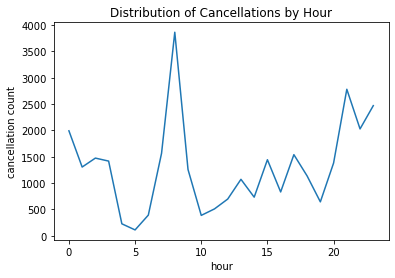

In [16]:
sns.lineplot(data = cancellations_by_hour, x = 'hour', y = 'cancellation count')
plt.title('Distribution of Cancellations by Hour')
plt.show();